In [21]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import regex

import nltk

nltk.data.path.append(r'C:\Users\roose\AppData\Roaming\nltk_data')

# # Baixar os pacotes necessários (se necessário)
nltk.download('punkt', download_dir=r'C:\Users\roose\AppData\Roaming\nltk_data')
nltk.download('stopwords', download_dir=r'C:\Users\roose\AppData\Roaming\nltk_data')
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: xlabel='Categoria'>

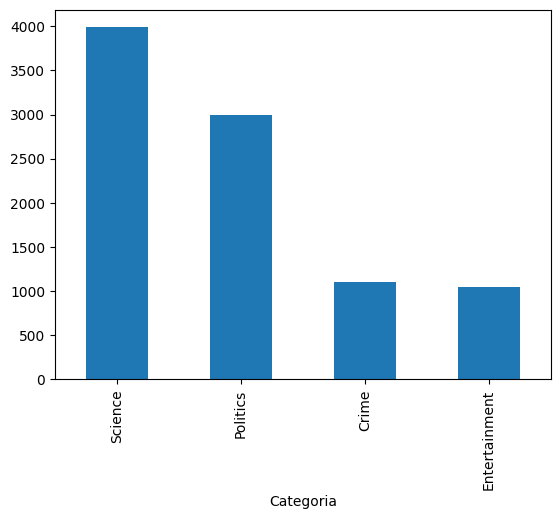

In [4]:
names = []

caminho_atual = os.getcwd()

base = os.path.join(caminho_atual, 'Data')

folders = os.listdir(base)
data = []

# Ler os arquivos e juntar em um arquivo só
for folder in folders:
    files = os.listdir(os.path.join(base, folder))
    for file in files:
        try:
            if file == 'combine.csv':
                pass
            with open(os.path.join(base, folder, file), encoding='utf-8') as f:
                contents = " ".join(f.readlines())
                data.append([file.split(".")[0], folder, contents])
        except Exception as e:
            pass

df = pd.DataFrame(data, columns=['ID', 'Categoria', 'Conteudo'])

df
df['Categoria'].value_counts().plot.bar()

In [10]:
unique = list(df.Conteudo.unique())


['\n Archive-name: ripem/faq\n Last-update: Sun, 7 Mar 93 21:00:00 -0500\n \n ABOUT THIS POSTING\n ------------------\n This is a (still rather rough) listing of likely questions and\n information about RIPEM, a program for public key mail encryption.  It\n (this FAQ, not RIPEM) was written and will be maintained by Marc\n VanHeyningen, <mvanheyn@whale.cs.indiana.edu>.  It will be posted to a\n variety of newsgroups on a monthly basis; follow-up discussion specific\n to RIPEM is redirected to the group alt.security.ripem.\n \n This month, I have reformatted this posting in an attempt to comply\n with the standards for HyperText FAQ formatting to allow easy\n manipulation of this document over the World Wide Web.  Let me know\n what you think.\n \n DISCLAIMER\n ----------\n Nothing in this FAQ should be considered legal advice, or anything\n other than one person\'s opinion.  If you want real legal advice, talk\n to a real lawyer.\n \n QUESTIONS AND ANSWERS\n ---------------------\n \n 

In [14]:
unique = list(df.Conteudo.unique())
dic = dict(df)

uni = {}
i = 0
for k in range(len(list(dic['Conteudo']))):
    if dic['Conteudo'][k] in unique:
        uni[i] = [dic['Conteudo'][k], dic['Categoria'][k],dic['ID'][k]]
        unique.remove(dic['Conteudo'][k])
        i += 1


data = pd.DataFrame(uni).T
print(data.shape)
data.columns = ['Conteudo', 'Categoria','Id']
data.head()

(6834, 3)


,Conteudo,Categoria,Id
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,14147
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,14831
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,14832
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,14982
4,\n Some sick part of me really liked that p...,Crime,14983


In [15]:
def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()



In [16]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\roose\AppData\Local\Temp\ipykernel_25968\2348179092.py:10: SyntaxWarning: invalid escape sequence '\p'
  filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]


In [18]:
data["filtered_text"] = data.Conteudo.apply(lambda x : filter_text(x, stop)) 
data.head()

,Conteudo,Categoria,Id,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,14147,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,14831,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,14832,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,14982,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Crime,14983,sick part really like phrase actually merely t...


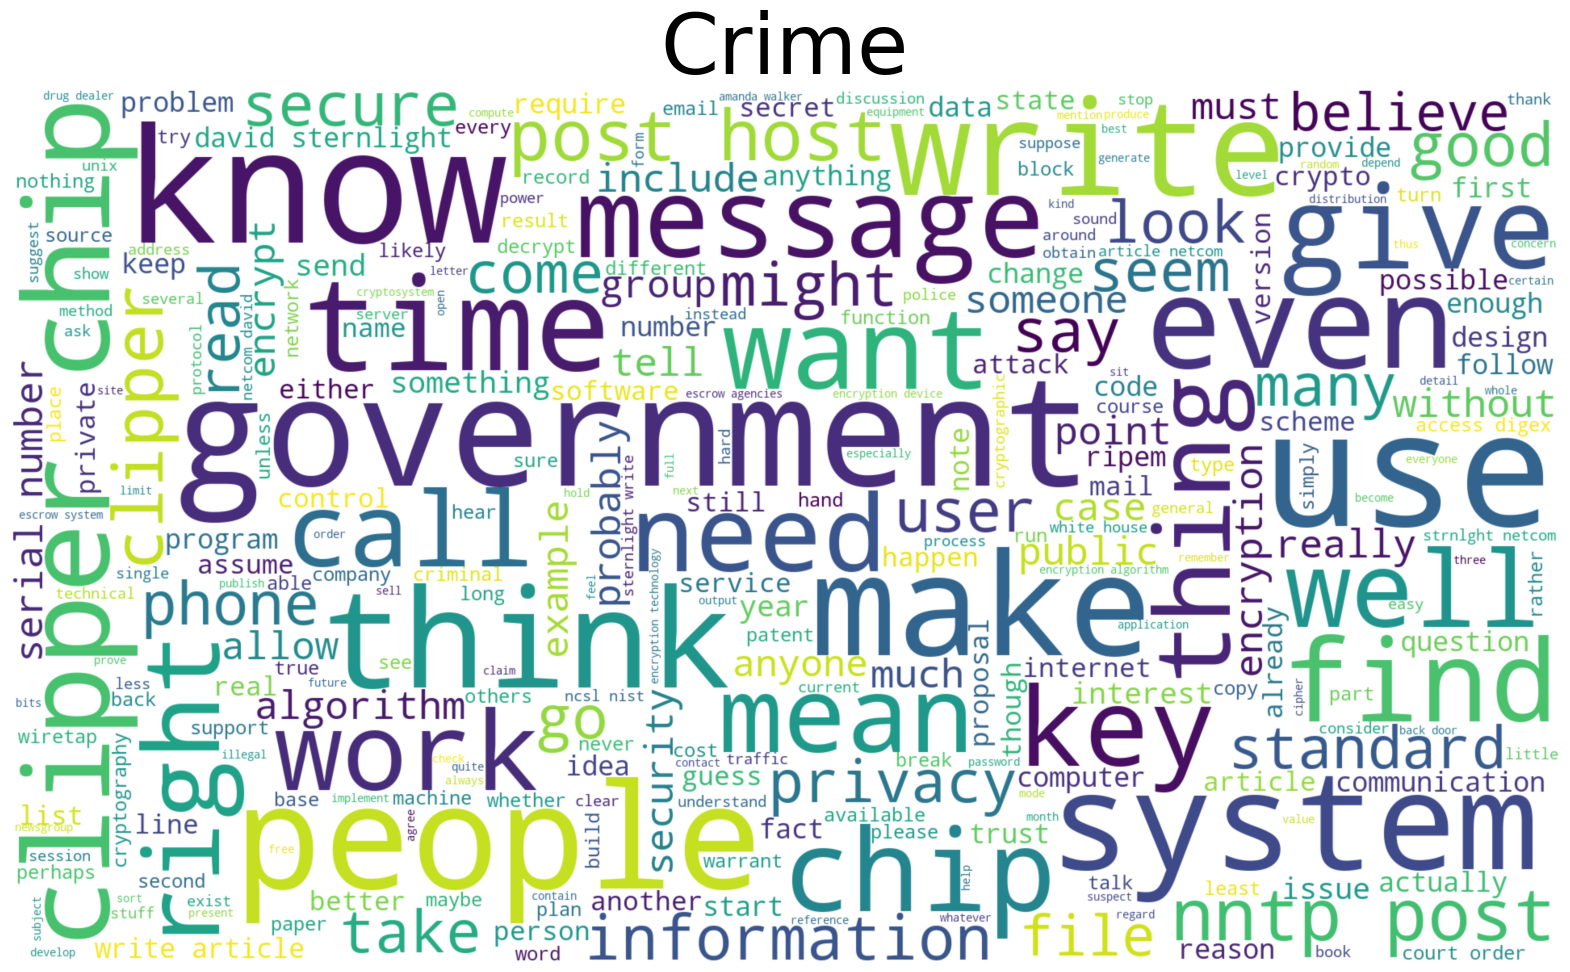

In [20]:
all_text = " ".join(data[data.Categoria == "Crime"].filtered_text) 
make_wordcloud(all_text, "Crime")

C:\Users\roose\AppData\Local\Temp\ipykernel_25968\3115267458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10.words.value_counts().index,
C:\Users\roose\AppData\Local\Temp\ipykernel_25968\3115267458.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = top_10.words.value_counts().index,


<Axes: xlabel='words', ylabel='count'>

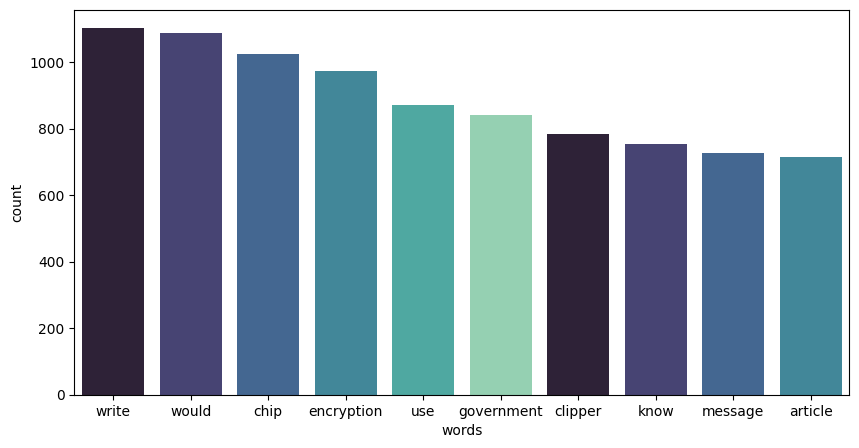

In [22]:
count = pd.DataFrame(all_text.split(), columns = ['words'])
top_10 = count[count['words'].isin(list(count.words.value_counts()[:10].index[:10]))]
plt.figure(figsize=(10,5))
sns.barplot(x = top_10.words.value_counts().index,
            y = top_10.words.value_counts(), palette = sns.color_palette("mako"))

In [8]:
# Agora o seu código deve funcionar corretamente
# Configurar as stopwords e o lemmatizer
en_stopwords = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()

def clean_contents_w_stopwords(contents):
    tokenized_word = word_tokenize(str(contents).replace("\n", "").replace("\\", "").replace(">", "").strip())
    tokenized_word_w_stopwords = []
    for word in tokenized_word:
        word = regex.sub(u'\p{^Latin}', u'', word.lower())
        if len(word) > 3 and word.strip().lower() not in en_stopwords:
            word = word_lemmatizer.lemmatize(word)
            tokenized_word_w_stopwords.append(word)
    tokenized_word_w_stopwords = " ".join(tokenized_word_w_stopwords)
    return tokenized_word_w_stopwords

# Exemplo de uso
comment_words = df[df['ID'] == 14991]['Conteudo'].to_string().replace("\n", "").replace("\\", "").replace(">", "").strip()
print(comment_words)

tokenized_word_w_stopwords = clean_contents_w_stopwords(comment_words)
print(tokenized_word_w_stopwords)


Series([], )


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\roose\AppData\Local\Temp\ipykernel_13036\412724222.py:10: SyntaxWarning: invalid escape sequence '\p'
  word = regex.sub(u'\p{^Latin}', u'', word.lower())


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\roose/nltk_data'
    - 'c:\\Users\\roose\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\roose\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\roose\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\roose\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\roose\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\roose\\AppData\\Roaming\\nltk_data'
**********************************************************************
